In [1]:
# Importing the libraries
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

In [2]:
# Download and Load Dataset
path = kagglehub.dataset_download("adilshamim8/student-performance-and-learning-style")
file_path = os.path.join(path, 'student_performance_large_dataset.csv')
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    raise FileNotFoundError("Dataset file not found. Please check the path and dataset availability.")

100%|██████████| 148k/148k [00:00<00:00, 44.3MB/s]

Extracting files...


In [3]:
# Display the first few rows of the dataset
print("Dataset Preview: ")
print(df.head())

Dataset Preview: 
  Student_ID  Age  Gender  Study_Hours_per_Week Preferred_Learning_Style  \
0     S00001   18  Female                    48              Kinesthetic   
1     S00002   29  Female                    30          Reading/Writing   
2     S00003   20  Female                    47              Kinesthetic   
3     S00004   23  Female                    13                 Auditory   
4     S00005   19  Female                    24                 Auditory   

   Online_Courses_Completed Participation_in_Discussions  \
0                        14                          Yes   
1                        20                           No   
2                        11                           No   
3                         0                          Yes   
4                        19                          Yes   

   Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
0                             100              69                   66   
1               

In [4]:
# Data Preprocessing
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Preferred_Learning_Style', 'Participation_in_Discussions', 'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Final_Grade']
for col in categorical_columns:
    if df[col].dtype == 'object':  # Ensure the column contains categorical data
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [5]:
# Define features & target
X = df.drop(columns=['Student_ID', 'Final_Grade'])
y = df['Final_Grade']

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Normalize numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed', 'Assignment_Completion_Rate (%)', 'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night']
for col in numerical_columns:
    if col in X_train.columns:
        X_train[col] = scaler.fit_transform(X_train[[col]])
        X_test[col] = scaler.transform(X_test[[col]])

In [8]:
# Train the models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(kernel = 'rbf'),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
}

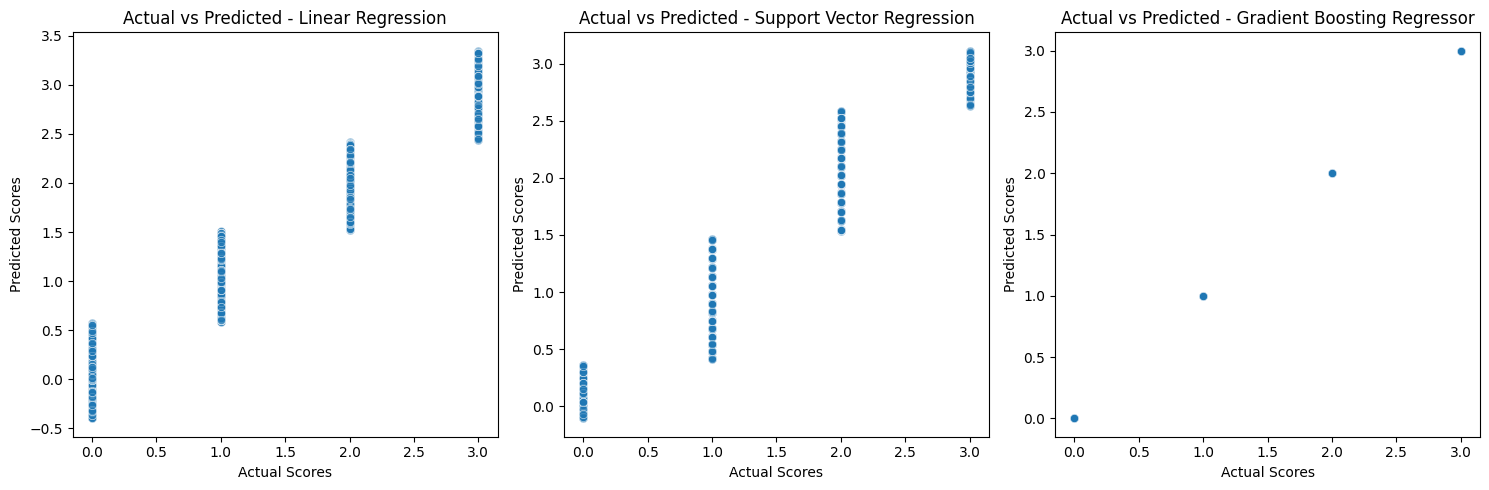

In [9]:
results = {}
plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

    # Plot actual vs predicted
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.xlabel("Actual Scores")
    plt.ylabel("Predicted Scores")
    plt.title(f"Actual vs Predicted - {name}")

plt.tight_layout()
plt.show()

In [10]:
# Display the results
results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)

Model Performance:
                                  MAE           MSE  R2 Score
Linear Regression            0.240929  7.966623e-02  0.937939
Support Vector Regression    0.202719  6.629568e-02  0.948355
Gradient Boosting Regressor  0.000027  9.061023e-10  1.000000
